In [1]:
import edward as ed
import edward.models as edm
import tensorflow as tf
import numpy as np
import pymisca.numpy_extra as pynp
# import tensor
import pymisca.util as pyutil;reload(pyutil)
import pymisca.vis_util as pyvis
# tf.contrib.distributions.Normal??

/home/shouldsee/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


is in ipython: 1
is in ipython: 1
is in ipython: 1
[WARN] pymisca.vis_util cannot find network


In [2]:
N = 5000
D = 9
X = np.random.normal(size=(N,D))
L = np.linalg.norm(X,axis=1,keepdims=1)
Xn = X/L

V=  np.mean(np.linalg.norm(Xn,axis=1)**2)
# print V/np.pi
# print V
c = 0.125
# c = 0.0
# c = 1.
i = 11

In [3]:

from tensorflow.python.framework import constant_op
from tensorflow.python.framework import dtypes
from tensorflow.python.framework import ops
from tensorflow.python.framework import tensor_shape
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import check_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import nn
from tensorflow.python.ops import random_ops
from tensorflow.python.ops import gen_linalg_ops
from tensorflow.python.ops.distributions import distribution
from tensorflow.python.ops.distributions import kullback_leibler
from tensorflow.python.ops.distributions import special_math
# tf.matrix_determinant


In [4]:

import edward as ed
import edward.models as edm
import tensorflow as tf
import numpy as np
import pymisca.numpy_extra as pynp
# import tensor
import pymisca.util as pyutil
import pymisca.vis_util as pyvis
import pymisca.tensorflow_extra as pytf;reload(pytf)
edm = pytf.edm
# pytf.sphereUniformDiag()
edm.sphereUniformDiag

abc.sphereUniformDiag

In [5]:
plt = pyutil.plt

(2,)
(array([0.2339102, 0.3479247, 0.2956797], dtype=float32), 0.08773068)
(array([0.38994843, 0.7620002 , 0.6475768 ], dtype=float32), 0.38401994)
(20, 40)
('[logProb]',)
(20, 40)
[ 0.33437794  0.23956695 -0.04296011]
(10, 2)
0.49999997
(5000, 2)
[1.  2.5]
(5000,)


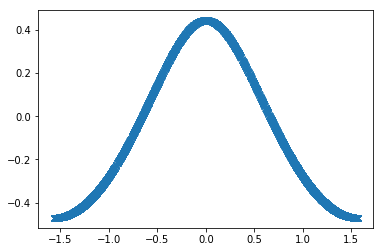

In [6]:

import tensorflow as tf
ed.set_seed(i)

sess = tf.InteractiveSession()
with sess.as_default():
#     scale = pyutil.random_covmat()
#     scale = ((1,0),(0,1.5))
    scale = (1., 2.5)
#     .astype(np.float32)
    X = tf.random_uniform(shape=(20,40,2)).eval()
    t =  edm.sphereUniformDiag(scale=scale,)
    print (t.batch_shape)
    Y = t._z(X)
    x=  X.flat[-3:]
    y = Y.eval().flat[-3:]
    lp = t.log_prob(X).eval()
    tn = t.sample(10).eval()
    print (x, pyutil.msq(x))
    print (y, pyutil.msq(y) )
    print (t._log_unnormalized_prob(X).eval().shape)
    
    print ('[logProb]',)
    print (lp.shape)
    print (lp.flat[-3:])
    print (tn.shape)    
#     print (tn)
    
    print (pyutil.msq(tn.flat[-2:]))
    X1 = np.random.multivariate_normal((0,0), np.diag(scale),size=5000)
#     X1 = X1/np.linalg.norm(X1,axis=1,keepdims=1)
    X1 = X1.astype(np.float32)
    X1lp = t.log_prob(X1).eval()
#     X1lp = t._log_unnormalized_prob(X1).eval()
    print (X1.shape)
    print (t.scale.eval())
    print (X1lp.shape)
#     print (t.log_prob(X1))
#     print (t.event_shape_tensor().eval())

ts = np.arctan(X1.T[1]/X1.T[0])
plt.plot(ts,X1lp,'x')


In [7]:
K = 1
# D = 10
K = scale = np.random.random(size=D)*3

x = np.random.random(size=(D,1))
K = np.diag(K) + x.T * x
scale  = K
# scale = (1., 2.5)

X1 = np.random.multivariate_normal((0,)*D, scale,size=5000)
#     X1 = X1/np.linalg.norm(X1,axis=1,keepdims=1)
X1 = X1.astype(np.float32)
# X1lp = t.log_prob(X1).eval()

data = X1
# scale = edm.Uniform(sample_shape=(D,D))
# scale = edm.WishartFull(scale=np.eye(D,dtype=  np.float32),df=100,)


scale_diag = edm.Uniform(sample_shape=(D))
scale_perturb_factor = edm.Uniform(sample_shape=(D,1))


# m = tf.contrib.distributions.Normal(
m0 = edm.sphereUniformDiag(
# m = aNorm(
# m  = edm.Normal(
    loc=np.array((0.,)*D).astype(np.float32),
    scale =  scale_diag,
    sample_shape = len(data),
)
    


# concentration = edm.Uniform(sample_shape=(1,))
# concentration = edm.D
concentration = tf.log( tf.constant([D/2.]) - 1. )
rate = edm.Uniform(sample_shape=(1,))

mDist = edm.GammaWithSoftplusConcentrationRate(
    concentration=concentration,
    rate=rate,
    sample_shape=[N])


# edm.sphereUniformDiag

# name = self.name
i+=1
name = 'test%d'%i
try:
    tf.get_variable(name+'/test',[1])
    reuse = None
except:
    reuse = True
print (reuse)
self = pyutil.util_obj()
with tf.variable_scope(name, reuse=reuse):
#     self.q_pi = ed.models.PointMass(
#         tf.nn.softmax(
#             tf.get_variable("q_pi", [K])
#         )
#     )
#     self.q_mu = ed.models.PointMass(
#         tf.get_variable("q_mu", [K,D])
#     )
    self.q_scale_diag  = edm.PointMass(
        tf.nn.softplus(
            tf.get_variable('q_scale_diag',shape=[D])
                      ),
    )
    self.q_scale_perturb_factor = ed.models.PointMass(
        (
            tf.get_variable("q_scale_perturb_factor", [D,1])
        )
    )
#     concentration = edm.Deterministic()
#     concentration = edm.Deterministic(tf.log( tf.constant([D/2.]) - 1. ))    
    concentration = edm.Uniform(sample_shape=(1,))
#     concentration = tf.log( tf.constant([D/2.]) - 1. )
    rate = edm.Deterministic(1E-20,sample_shape=(1,))
#     rate = edm.Uniform(sample_shape=(1,))
    m = edm.sphereUniformLRP(
    # m = aNorm(
    # m  = edm.Normal(
    #     loc=np.array((0.,)*D).astype(np.float32),
        concentration = concentration,
        rate=rate,
        scale_diag =  scale_diag,
        scale_perturb_factor = scale_perturb_factor,
        sample_shape = len(data),
#         detPenalty = 0.5,

    )    

    mDist = edm.GammaWithSoftplusConcentrationRate(
        concentration=concentration,
        rate=rate,
        sample_shape=[N])
    self.q_concentration  = edm.PointMass(
        nn.softplus(
            tf.get_variable('q_concentration',shape=[1])
        )
    )
    self.q_rate  = edm.PointMass(
        nn.softplus(
        tf.get_variable('q_rate',shape=[1])
        )
    )
    
    
# self.q_m = edm.sphereUniformLRP(
# # m = aNorm(
# # m  = edm.Normal(
# #     loc=np.array((0.,)*D).astype(np.float32),
#     scale_diag =  self.q_scale_diag,
#     scale_perturb_factor = self.q_scale_perturb_factor,
#     sample_shape = len(data),

# )

# m.scale.b
# m = edm.MultivariateNormalFullCovariance(loc=np.array((0.,)*D).astype(np.float32),
#                                      covariance_matrix=scale,
#                                      sample_shape=len(data))
# q_scale = edm.PointMass(tf.get_variable(shape = (D,D),name='q_scale8'))
# ed.MAP
inf = ed.MAP({
            scale_diag:self.q_scale_diag,
              scale_perturb_factor:self.q_scale_perturb_factor,
              concentration : self.q_concentration,
              rate: self.q_rate,
#               q_scale
             },{m:data, 
#                 mDist: tf.expand_dims(self.q_m.kernelDist(data),axis=-1)
               }
)

print np.diag(K)

None


ValueError: Shape must be rank 2 but is rank 3 for 'test12/sphereUniformLRP/sample/LinearOperatorUDVHUpdate/solve/LinearOperatorUDVHUpdate/solve/MatMul' (op: 'MatMul') with input shapes: [9,1], [5000,9,1].

In [8]:
# dist = qm.kernelDist(X1).eval()
# # distn = dist/ np.std(dist)
# distn = dist
# count,xbin,_ = plt.hist(distn,100,normed=1);

# prob = q_mDist.prob(xbin).eval()
# plt.plot(xbin,prob)

In [ ]:
lst = 50,100,200,1000

n_iter = 50
# for n_iter in lst:
n_iter = 0
# i = 5
for _ in range(1):
    i+=1;
    sess = tf.InteractiveSession()
    with sess.as_default():
        tf.global_variables_initializer().run()
#         np.random.seed(i)
#         tf.set_random_seed(i)
        print (self.q_scale_diag.eval())
    
        inf = ed.MAP({
                scale_diag:self.q_scale_diag,
              scale_perturb_factor:self.q_scale_perturb_factor,
              concentration : self.q_concentration,
              rate: self.q_rate,
            
#               q_scale
             },{
            m:data, 
#                 mDist: tf.expand_dims(m.kernelDist(data),axis=-1)
        })


#         inf = ed.MAP({scale_diag:self.q_scale_diag,
#                       scale_perturb_factor:self.q_scale_perturb_factor,
#         #               q_scale
#                      },{m:data})
        inf.run(n_iter=1)

        n_iter = 0
#         for _ in range(10):    
        for _ in range(3):    
            sigsq = self.q_scale_diag.eval()
            sigsq = np.diag(self.q_scale_diag.eval()) + self.q_scale_perturb_factor.eval().T * self.q_scale_perturb_factor.eval()
            sigsq = np.dot(sigsq,sigsq)
#             print (_, sigsq[0]/sigsq[1],sigsq)
            n_iter += 200
            [x.run() for x in inf.reset]
            inf.run(n_iter=n_iter)
            for mat in [sigsq, np.linalg.inv(K)]:
                print (pyutil.mat2str(np.diag(pyutil.detNorm(mat)),decimal=3))
                print (np.log1p(np.exp([self.q_rate.eval()[0],
                                        self.q_concentration.eval()[0]])[::-1]),
                       data.shape)
#             print (np.diag(pyutil.detNorm(sigsq)).tolist());print(np.diag(pyutil.detNorm(K))**-1)
#         break

In [ ]:
np.log1p(np.exp([self.q_rate.eval()[0],self.q_concentration.eval()[0]])[::-1]),data.shape

In [ ]:

qm = edm.sphereUniformLRP(
#     concentration = self.q_concentration,
#     rate = self.q_rate,
#     rate = rate,
    scale_diag =  self.q_scale_diag,
    scale_perturb_factor = self.q_scale_perturb_factor,
    sample_shape = len(data),

)
pyutil.detNorm(qm.precision.eval())

q_mDist = edm.Gamma(
    concentration=self.q_concentration,
#     concentration=self.q_concentration,
#     rate=self.q_rate,
    rate = rate,
    sample_shape=[N])


dist = qm.kernelDist(X1).eval()
# distn = dist/ np.std(dist)
distn = dist
count,xbin,_ = plt.hist(distn,100,normed=1);
# prob
prob = q_mDist.prob(xbin).eval()
plt.plot(xbin,prob)

In [ ]:
q_mDist.mean().eval()

In [ ]:
np.log1p(np.exp([self.q_rate.eval()[0],self.q_concentration.eval()[0]])[::-1]),data.shape

In [ ]:
[x.run() for x in inf.reset]
n_iter = 1800
inf.run(n_iter=n_iter)

In [ ]:
            sigsq = self.q_scale_diag.eval()
            sigsq = np.diag(self.q_scale_diag.eval()) + self.q_scale_perturb_factor.eval().T * self.q_scale_perturb_factor.eval()
            sigsq = np.dot(sigsq,sigsq)
# #             print (_, sigsq[0]/sigsq[1],sigsq)
#             n_iter += 200
#             [x.run() for x in inf.reset]
#             inf.run(n_iter=n_iter)
            for mat in [sigsq, np.linalg.inv(K)]:
                print (pyutil.mat2str(np.diag(pyutil.detNorm(mat)),decimal=3))        

In [ ]:
np.diag(qm.precision.eval())

In [ ]:

qm = edm.sphereUniformLRP(
    concentration = self.q_concentration,
    rate = self.q_rate,
    scale_diag =  self.q_scale_diag,
    scale_perturb_factor = self.q_scale_perturb_factor,
    sample_shape = len(data),

)
pyutil.detNorm(qm.precision.eval())

q_mDist = edm.Gamma(
#     concentration=concentration,
    concentration=self.q_concentration,
    rate=self.q_rate,
    sample_shape=[N])


dist = qm.kernelDist(X1).eval()
# distn = dist/ np.std(dist)
distn = dist
count,xbin,_ = plt.hist(distn,100,normed=1);

prob = q_mDist.prob(xbin).eval()
plt.plot(xbin,prob)

In [ ]:
np.log1p(np.exp([self.q_rate.eval()[0],self.q_concentration.eval()[0]])[::-1]),data.shape

In [ ]:
dData = qm.kernelDist(data).eval()
np.diag(qm.precision.eval())


In [ ]:
# ??edm.GammaWithSoftplusConcentrationRate
# ??tf.contrib.distributions.Gamma

In [ ]:
i+=1
name = 'test%d'%i
try:
    tf.get_variable(name+'/test',[1])
    reuse = None
except:
    reuse = True
print (reuse)
# self = pyutil.util_obj()

with tf.variable_scope(name, reuse=reuse):
    concentration = edm.Uniform(sample_shape=(1,))
#     concentration = edm.Deterministic(tf.log( tf.constant([D/2.]) - 1. ))
    rate = edm.Uniform(sample_shape=(1,))
#     mDist = edm.Gamma(
# #         concentration =
#     )
    mDist = edm.GammaWithSoftplusConcentrationRate(
        concentration=concentration,
        rate=rate,
        sample_shape=[N])
#     edm.Deterministic
    self.q_concentration  = edm.PointMass(
        tf.get_variable('q_concentration',shape=[1])
    )
    self.q_rate  = edm.PointMass(
        tf.get_variable('q_rate',shape=[1])
    )

    inf = ed.MAP({
#             scale_diag:self.q_scale_diag,
#               scale_perturb_factor:self.q_scale_perturb_factor,
#             concentration:concentration,
              concentration : self.q_concentration,
              rate: self.q_rate,
#               q_scale
             },{
#             m:data, 
                mDist :dData[:,None]})
#                 mDist: tf.expand_dims(dData,axis=-1)})
inf.run(n_iter=2000)

In [ ]:
np.diag(qm.precision.eval())

In [ ]:
self.q_concentration.eval()

In [ ]:
q_mDist = edm.GammaWithSoftplusConcentrationRate(
    concentration=self.q_concentration,
#     concentration=concentration,
    rate=self.q_rate,
    sample_shape=[N])

dist = dData
# dist = qm.kernelDist(X1).eval()
# distn = dist/ np.std(dist)
distn = dist
count,xbin,_ = plt.hist(distn,100,normed=1);

prob = q_mDist.prob(xbin).eval()
plt.plot(xbin,prob)

In [ ]:
np.log1p(np.exp([self.q_rate.eval()[0],self.q_concentration.eval()[0]])[::-1]),data.shape

In [ ]:
# nn.softplus??
xs= np.linspace(-10,10,100)
# ys = nn.softplus(xs).eval()
ys = np.log(10+np.exp(xs))
plt.plot(xs,ys)

ys = np.log(1+np.exp(xs))
plt.plot(xs,ys)

ys = np.log(0.1+np.exp(xs))
plt.plot(xs,ys)

In [ ]:
data.shape

In [ ]:
nn.softplus(tf.concat([self.q_concentration,self.q_rate],0)).eval() + 1